# PageRank B 
---------------------------------------------

## Comments

This chapter continues our exploration of **discrete time Markov chains**.  In particular, it studies the convergence of the fraction of time that a Markov chain spends in the states and also the convergence of the probability of being in the states.  We start with coin flips before moving to Markov chains.

## Law of Large Numbers for Coin Flips

You flip a biased coin $N$ times.  The probability of heads is $p$.  Let $X(N)$ be the number of heads.  Then,

$$P(X(N) = n) = {N \choose n} p^n (1 - p)^{N-n}, n = 0, 1, \ldots, N. \tag{2.1}$$

Recall that ${N \choose n} = N!/(n!(N - n)!)$ where $m! = 1\times 2 \times \cdots \times m$ and $0! := 1$.  The expression above is the **binominal distribution** with parameters $N$ and $p$ and we write $X(N) =_D B(N,p)$.

We plot this distribution:

In [1]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *

print('The libraries loaded successfully')

The libraries loaded successfully


We display the widgets to select parameters.

In [2]:
def dummy(pd, Nd):
    global p, N
    p, N = float(pd), int(Nd)
pd = widgets.Dropdown(options=['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'],value='0.5',description='p',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, pd = pd, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='p', index=4, options=('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0…

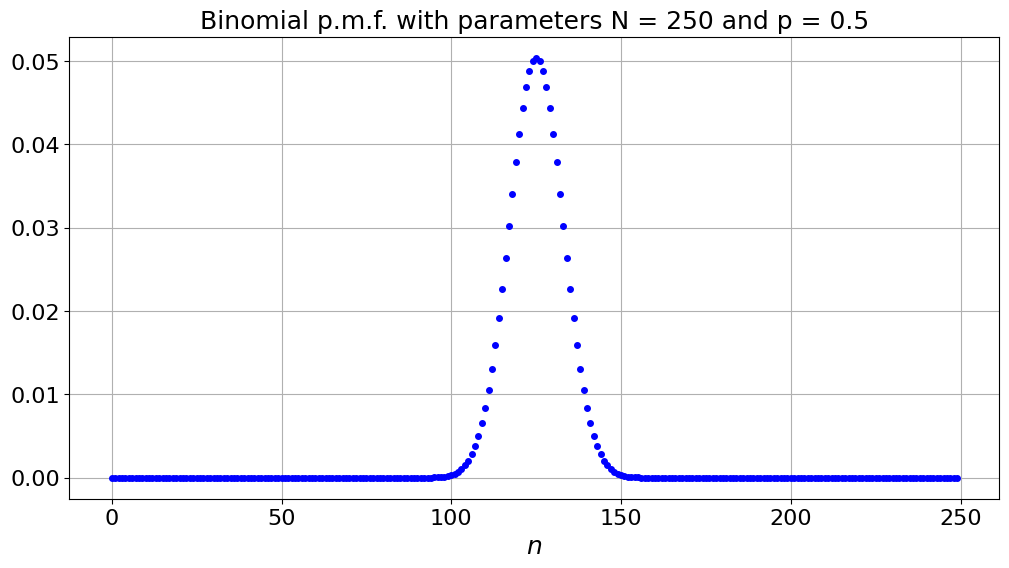

In [3]:
def IplotBinomial(N,p):
    fig, ax = plt.subplots()
    plt.xlabel("$n$")
    plt.title('Binomial p.m.f. with parameters N = ' + str(N) + ' and p = ' + str(p))
    x = np.arange(N)
    ax.plot(x, binom.pmf(x, N, p), 'bo', ms=4)
    ax.grid(True)
    plt.show()
matplotlib.rcParams.update(params)    
IplotBinomial(N,p)

The figure shows that it is unlikely that $X(N)/N$ differs much from $p$, specially when $N$ is large.  In fact, a bit of algebra based (2.1) shows that, for any given $\epsilon > 0$,

$$P( |\frac{X(N)}{N} - p| > \epsilon) \leq A \exp\{- \alpha N\}, N \geq 1 \tag{2.2}$$

where $A > 0$ and $\alpha > 0$ are constants that do not depend on $N$. 

The book proves a similar inequality in section 2.2. 


We will use this fact to prove the following remarkable property:

**Theorem (SLLN)**

One has

$$\frac{X(N)}{N} \to p \mbox{ as } N \to \infty.$$

The figure below illustrates that property, called the **Strong Law of Large Numbers**.

In [4]:
def dummy(pd, Nd):
    global p, N
    p, N = float(pd), int(Nd)
pd = widgets.Dropdown(options=['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'],value='0.5',description='p',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, pd = pd, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='p', index=4, options=('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0…

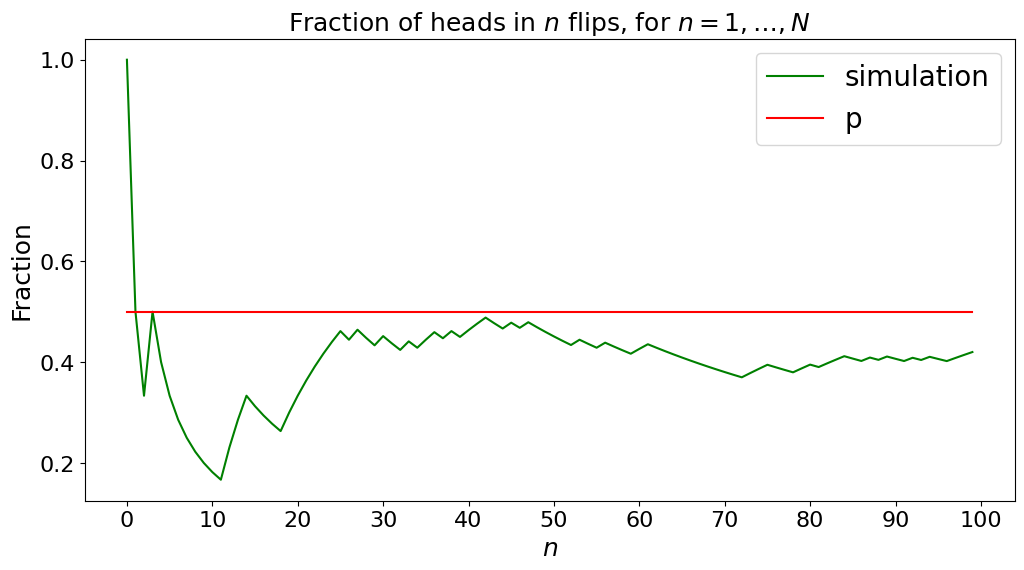

In [5]:
def SLLN_demo(N,p):
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0, N)
    b[0]= np.random.binomial(1,p)
    c[0] = p
    for i in range(0,N-1):
        b[i+1] = (b[i]*(i+1) + np.random.binomial(1,p))/(i+2)
        c[i+1] = p
    colours = ["b","g","r"]
    plt.plot(a, b, color=colours[1],label="simulation")
    plt.plot(a, c, color=colours[2],label="p")
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    plt.legend()
    plt.ylabel("Fraction")
    plt.xlabel("$n$")
    plt.title("Fraction of heads in $n$ flips, for $n = 1, \ldots, N$")
    
SLLN_demo(N,p)

The SLLN says that, as you keep on flipping the coin, the fraction $X(N)/N$ approaches $p$, for **any experiment**.  The inequality (2.1) says that for most experiments $X(N)/N$ is close to $p$.  The SLLN says that for all experiments, $X(N)/N$ gets closer and closer to $p$.

The proof of this result is based on the lemma below.

### Borel-Cantelli: Don't Push Your Luck!

This result says that your luck will run out if you push it too far!  

**Borel-Cantelli Lemma:** Assume that event $n$ occurs with probability $p_n$, for $n = 1, 2, \ldots$.  If $\sum_{n=1}^\infty p_n < \infty$, then only finitely many of the events occur. Moreover, if the events are independent and if $\sum_n p_n = \infty$, then infinitely many of the events occur. See the book for a proof of the lemma.
  
As an example, say that coin $n$ has a probability $p_n$ of heads.  We flip the coins $0, 1, 2, \ldots, n$
and collect $X_n$ heads.  The B-C lemma says that if $\sum_n p_n < \infty$, then $X_n$ eventually stops growing and that $X_n \to \infty$ if $\sum_n p_n = \infty$,


We do the experiment below in two cases: 

* In case (a), $p_n = 1/(n+1)$

* In case (b), $p_n 2^{- 0.01n}$ for $n = 0, 1, \ldots$.


In [6]:
def dummy(Nd,cased):
    global N, case
    N, case = int(Nd), str(cased)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)
cased = widgets.ToggleButtons(options=['(a)', '(b)'],description='Case:',disabled=False,button_style='info',tooltip='Description')

z = widgets.interactive(dummy, Nd = Nd,cased=cased) 
display(z)

interactive(children=(Dropdown(description='N', index=4, options=('10', '30', '50', '70', '100', '150', '200',…

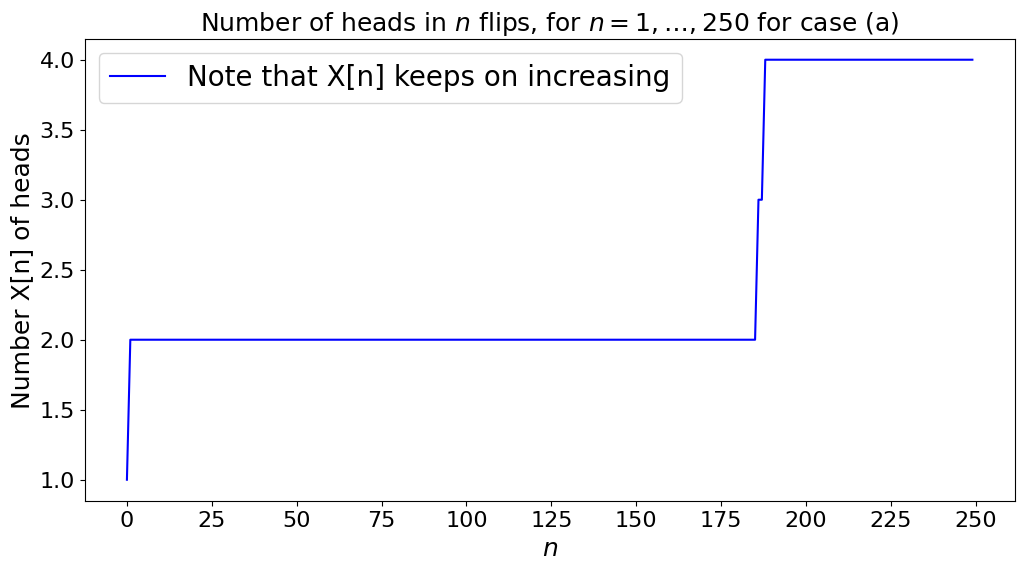

In [7]:
def BC_demo(N,case):
    a = np.arange(0.0,N)
    b = np.arange(0,N)    
    b[0]= 1    
    for n in range(0,N-1):
        if case == '(a)':
            p = 1/(1+n)
        else:
            p = 2**(- 0.01*n)            
        b[n+1] = b[n] + np.random.binomial(1,p)
    plt.ylabel("Number X[n] of heads")
    plt.xlabel("$n$")
    plt.title('Number of heads in $n$ flips, for $n = 1, \ldots,$' + str(N) +' for case ' + str(case)) 
    if case == '(a)':
        label = 'Note that X[n] keeps on increasing'
    else:
        label = 'Note that X(n) eventually stops increasing'
    plt.plot(a, b, color='b',label=label)        
    plt.legend()
    d =[0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    d = list(d)
    d = [int(x) for x in d]
    plt.xticks(d)
    
BC_demo(N,case)    

Thus, in case (a), $\sum_n p_n = \infty$ and, the coin flips being independent, B-C tells us that infinitely many coins yield heads.  In case (b), $\sum_n p_n < \infty$ and B-C states that only finitely many coins yield heads.  This result may not be very intuitive: it states that, in case (b), as you keep flipping coins forever, your luck runs out after a finite number of flips and you will never succeed thereafter!  (You may have to try (a) a number of times to see that $X_n$ keeps on growing.)

### SLLN and Borel-Cantelli

Let us apply B-C to prove the SLLN for the coin flips. 

Using (2.2) and B-C, we see that $\{|\frac{X(N)}{N} - p| > \epsilon\}$ occurs for finitely many $N$'s.  Hence, there is some $N_0$ such that, for all $N \geq N_0$, one has $|\frac{X(N)}{N} - p| > \epsilon$.  Since $\epsilon > 0$ is arbitrary, this proves that $X(N)/N \to p$ as $N \to \infty$.

### SLLN for i.i.d. Random Variables

Let $Y_1, Y_2, \ldots$ be independent and identically distributed random variables.  Let also $X(N) = Y_1 + \cdots + Y_N$.  Then, under a weak condition,

$$\frac{X(N)}{N} \to E(Y_1) \mbox{ as } N \to \infty. \tag{2.4}$$

The book proves that result assuming that $E(Y_1^4) < \infty$.  Using that assumption, one shows that

$$P(| \frac{X(N)}{N} - E(Y_1)| \geq \epsilon) \leq \frac{A}{N^2} \tag{2.5}$$

for some constant $A$ that does not depend on $N$.  Since these probabilities have a finite sum over $N$, one can use the same argument as for coin flips to prove (2.4).

### SLLN for Markov Chains

As we saw in Chapter 1, if a Markov chain is irreducible, the fraction of time it spends in state $i$ converges to $\pi(i)$, the invariant probability of that state.  Recall that we find $\pi$ by solving the balance equations $\pi = \pi P$.

The proof of the theorem looks that the successive times $\tau, \tau + T_1, \tau + T_1 + T_2, \ldots$ when the Markov chain returns to state $i$.  The random variables $T_1, T_2, \ldots$ are independent and identically distributed because the Markov chain restarts afresh whenever it enters state $i$.  Consequently, the SLLN holds for these times, and this shows that the time for $n$ successive visits to state $i$ is roughly $n E(T_1)$, which proves that the fraction of time in state $i$ converges to $1/E(T_1)$.  One can then show that these limiting fractions of time solve the balance equations and, therefore, $1/E(T_1) = \pi(i)$.